In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

In [3]:
from commons import smoothen

In [4]:
fontsize = 14

# Preparations

## Loading the data

Let's start by loading the growth curves $N_i(t)$ :

In [5]:
Nt = smoothen(np.load("curves_raw.npy"), 10)

Now let's calculate the derivatives $\frac{\Delta N_i}{\Delta t}(t) = \Delta N_i(t)$ and relative growth rates $\rho_i(t) = \frac{\Delta N_i}{N_i}(t)$ :

In [6]:
dNdt = Nt[..., 1:] - Nt[..., :-1]

In [7]:
rho = dNdt / Nt[..., :-1]

For convenience, let's store the dimensions of $\rho_i(t)$ :

In [8]:
n_plates, n_rows, n_columns, n_points = rho.shape
plates, rows, columns, points = map(np.arange, rho.shape)

We will also need the growth and maintenance terms $\nu_1$ and $\nu_2$ :

In [9]:
params = pd.read_csv("diffusion-parameters/optimal.csv")

# Figure

I hope I'll never write such ugly code ever again.

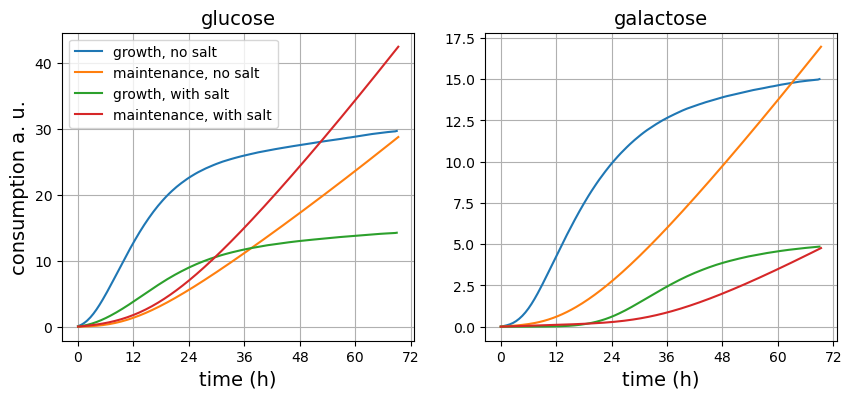

In [10]:
fig, (ax_glc, ax_gal) = plt.subplots(ncols = 2, figsize = (10, 4))

nu1, nu2 = params.loc[1, ["nu1", "nu2"]]
nt = Nt[1].reshape((-1, n_points+1)).cumsum(axis = 1).mean(axis = 0)
dndt = dNdt[1].reshape((-1, n_points)).cumsum(axis = 1).mean(axis = 0)
ax_glc.plot(nu1 * dndt, label = "growth, no salt", color = "tab:blue")
ax_glc.plot(nu2 * nt, label = "maintenance, no salt", color = "tab:orange")
nu1, nu2 = params.loc[2, ["nu1", "nu2"]]
nt = Nt[2].reshape((-1, n_points+1)).cumsum(axis = 1).mean(axis = 0)
dndt = dNdt[2].reshape((-1, n_points)).cumsum(axis = 1).mean(axis = 0)
ax_glc.plot(nu1 * dndt, label = "growth, with salt", color = "tab:green")
ax_glc.plot(nu2 * nt, label = "maintenance, with salt", color = "tab:red")
ax_glc.set_xlabel("time (h)", fontsize = fontsize)
ax_glc.set_xticks([0, 36, 72, 108, 144, 180, 216], labels = [0, 12, 24, 36, 48, 60, 72])
ax_glc.set_title("glucose", fontsize = fontsize)
ax_glc.legend()
ax_glc.set_ylabel("consumption a. u.", fontsize = fontsize)
ax_glc.grid()

nu1, nu2 = params.loc[3, ["nu1", "nu2"]]
nt = Nt[3].reshape((-1, n_points+1)).cumsum(axis = 1).mean(axis = 0)
dndt = dNdt[3].reshape((-1, n_points)).cumsum(axis = 1).mean(axis = 0)
ax_gal.plot(nu1 * dndt, color = "tab:blue")
ax_gal.plot(nu2 * nt, color = "tab:orange")
nu1, nu2 = params.loc[0, ["nu1", "nu2"]]
nt = Nt[0].reshape((-1, n_points+1)).cumsum(axis = 1).mean(axis = 0)
dndt = dNdt[0].reshape((-1, n_points)).cumsum(axis = 1).mean(axis = 0)
ax_gal.plot(nu1 * dndt, color = "tab:green")
ax_gal.plot(nu2 * nt, color = "tab:red")
ax_gal.set_xlabel("time (h)", fontsize = fontsize)
ax_gal.set_xticks([0, 36, 72, 108, 144, 180, 216], labels = [0, 12, 24, 36, 48, 60, 72])
ax_gal.set_title("galactose", fontsize = fontsize)
ax_gal.grid()

fig.savefig(f"plots/figure-s7/consumption.pdf", bbox_inches = "tight")
fig.savefig(f"plots/figure-s7/consumption.png", bbox_inches = "tight");